<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_5sem/blob/main/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0%D0%BA%D0%B8_6%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Численное решение краевой задачи

In [2]:
# Краевая задача для диф. уравнения 2 порядка
# y'' + p(x)y' + q(x)y = f(x)
# a1 * y(0) + b1 * y'(0) = g1
# a2 * y(1) + b2 * y'(1) = g2

def P(x):
  # return np.tan(x)
  return x / (1 + x**2)
def Q(x):
  # return -2*x / np.cos(x)
  return -1 / (1 + x**2)
def F(x):
  # return 2 - 2*x**3 / np.cos(x)
  return (3 - 2*x + 4*x**2) * np.exp(-2*x) / (1 + x**2)

def result(x, u, u2):
  return -1*P(x)*u2 - Q(x)*u + F(x)
  

# a1 = 2
# b1 = -1
# g1 = -1
# a2 = 3
# b2 = 1
# # g2 = 8.0647152
# g2 =8.064715260291829

# второй вариант 1 и 3 рода
a1 = 2
b1 = -1
g1 = 6
a2 = 1
b2 = 0
# g2 =1.5495488456097077
g2 =1.54955

# второй вариант 3 и 3 рода
# a1 = 2
# b1 = -1
# g1 = 6
# a2 = 1
# b2 = 1
# # g2 =1.9859850603230298
# g2 =1.985985

start_arr = [a1, b1, g1, a2, b2, g2]

def solution(x):
  # return np.sin(x)+x**2
  return np.sqrt(1 + x**2) + np.exp(-2*x)

START = 0
FINISH = 1

# задаем h
h = 0.1
N = int((FINISH-START)//h)+2

start_x = np.linspace(START, FINISH, N)
start_y = solution( start_x )

In [ ]:
print( np.sqrt(2) + np.exp(-2) + 1/np.sqrt(2) - 2*np.exp(-2))

1.9859850603230298


## Разностный подход 1 и 2 порядка + Метод прогонки 

In [3]:
def Difference_approach_1(start_x, P, Q, F, start_arr):
    a1 = start_arr[0]
    b1 = start_arr[1]
    g1 = start_arr[2]
    a2 = start_arr[3]
    b2 = start_arr[4]
    g2 = start_arr[5]
    
    a = np.zeros(len(start_x))
    b = np.zeros(len(start_x))
    c = np.zeros(len(start_x))
    f = np.zeros(len(start_x))
    h = start_x[3] - start_x[2] 
    LENGTH = len(start_x) - 1

  # граничные условия
    if b1 == 0:
        a[0] = 0
        b[0] = a1
        c[0] = 0
        f[0] = g1
    else:
        a[0] = 0
        b[0] = a1 - b1/h
        c[0] = b1/h
        f[0] = g1

    if b2 == 0:
        a[-1] = 0
        b[-1] = a2
        c[-1] = 0
        f[-1] = g2
    else:
        a[-1] = -1*b2/h
        b[-1] = a2 + b2/h
        c[-1] = 0
        f[-1] = g2   

  # коэф-ты системы уравнений
    for i in range(1, LENGTH):
        a[i] = 1/(h**2) - P(start_x[i]) / (2*h)
    for i in range(1, LENGTH):
        b[i] = -2/(h**2) + Q(start_x[i])
    for i in range(1, LENGTH):
        c[i] = 1/(h**2) + P(start_x[i]) / (2*h)
    for i in range(1, LENGTH):
        f[i] = F(start_x[i])

    return Progonka(a,b,c,f) 


def Progonka(a, b, c, f):
#-------------------Прямой ход-------------------------------
    LENGTH = len(a) - 1

    A = np.zeros(len(a))
    B = np.zeros(len(a))

    A[0] = -c[0] / b[0]
    B[0] = f[0] / b[0]

    for i in range(1, LENGTH):
        A[i] = -c[i] / (b[i] + a[i]*A[i-1])
    for i in range(1, LENGTH):
        B[i] = (f[i] - a[i]*B[i-1]) / (b[i] + a[i]*A[i-1])

    A[-1] = 0
    B[-1] = (f[-1] - a[-1]*B[-2]) / (b[-1] + a[-1]*A[-2])

#-------------------Обратный ход-----------------------------
    y = np.zeros(len(a))
    y[-1] = B[-1]
    for i in range(LENGTH - 1, -1, -1):
        y[i] = B[i] + A[i]*y[i+1]

    return y


def Difference_approach_2(start_x, P, Q, F, start_arr):
    a1 = start_arr[0]
    b1 = start_arr[1]
    g1 = start_arr[2]
    a2 = start_arr[3]
    b2 = start_arr[4]
    g2 = start_arr[5]

    a = np.zeros(len(start_x))
    b = np.zeros(len(start_x))
    c = np.zeros(len(start_x))
    f = np.zeros(len(start_x))
    h = start_x[3] - start_x[2] 
    LENGTH = len(start_x) - 1

  # граничные условия
    if b1 == 0:
        a[0] = 0
        b[0] = a1
        c[0] = 0
        f[0] = g1
    else:
        a[0] = 0
        # -2 + (2*a1*h / b1) + у П.Н.
        b[0] = -2 + (2*a1*h / b1) - (P(start_x[0])*a1*(h**2) / b1) + Q(start_x[0])*(h**2)
        c[0] = 2
        f[0] = F(start_x[0])*(h**2) + ((g1*2*h) / b1) - (P(start_x[0])*g1*(h**2) / b1)

    if b2 == 0:
        a[-1] = 0
        b[-1] = a2
        c[-1] = 0
        f[-1] = g2
    else:
        a[-1] = 2
        b[-1] = -2 - (2*h*a2 / b2) - (P(start_x[-1])*(h**2)*a2 / b2) + (Q(start_x[-1])*(h**2))
        c[-1] = 0
        f[-1] = F(start_x[-1])*(h**2) - ((h**2)*P(start_x[-1])*g2 / b2) - (2*h*g2/b2)

  # коэф-ты системы уравнений
    for i in range(1, LENGTH):
        a[i] = 1/(h**2) - P(start_x[i]) / (2*h)
    for i in range(1, LENGTH):
        b[i] = -2/(h**2) + Q(start_x[i])
    for i in range(1, LENGTH):
        c[i] = 1/(h**2) + P(start_x[i]) / (2*h)
    for i in range(1, LENGTH):
        f[i] = F(start_x[i]) 

    return Progonka(a,b,c,f)       

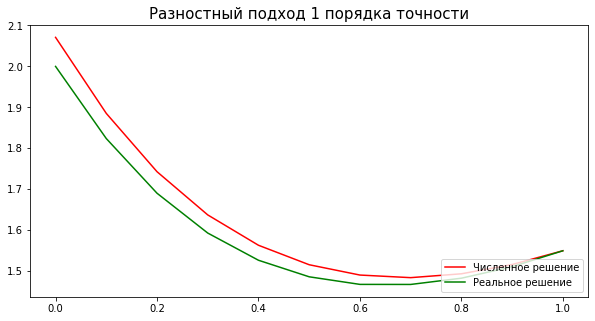

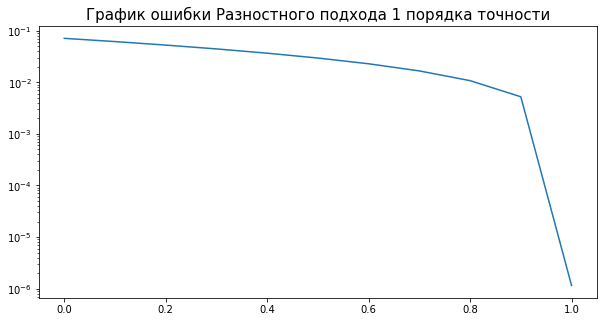

In [4]:
y_progonka_1 = Difference_approach_1(start_x, P, Q, F, start_arr)

fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("Разностный подход 1 порядка точности", fontsize=15)
ax_real.plot(start_x, y_progonka_1, c='red', label="Численное решение")
ax_real.plot(start_x, start_y, c='green', label="Реальное решение")
ax_real.legend(loc='lower right')


loss_progonka_1 = []
for i in range(len(start_x)):
    loss_progonka_1.append(abs(start_y[i]-y_progonka_1[i]))

fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки Разностного подхода 1 порядка точности", fontsize=15)
ax_real.plot(start_x, loss_progonka_1)
plt.yscale('log')

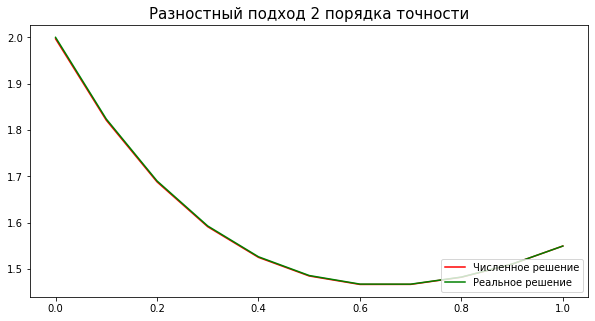

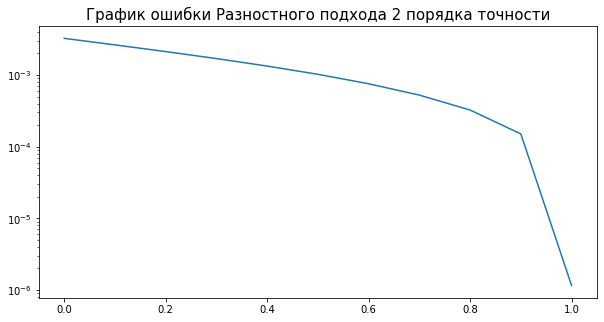

In [5]:
y_progonka_2 = Difference_approach_2(start_x, P, Q, F, start_arr)

fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("Разностный подход 2 порядка точности", fontsize=15)
ax_real.plot(start_x, y_progonka_2, c='red', label="Численное решение")
ax_real.plot(start_x, start_y, c='green', label="Реальное решение")
ax_real.legend(loc='lower right')


loss_progonka_2 = []
for i in range(len(start_x)):
    loss_progonka_2.append(abs(start_y[i]-y_progonka_2[i]))

fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки Разностного подхода 2 порядка точности", fontsize=15)
ax_real.plot(start_x, loss_progonka_2)
plt.yscale('log')

## Графики

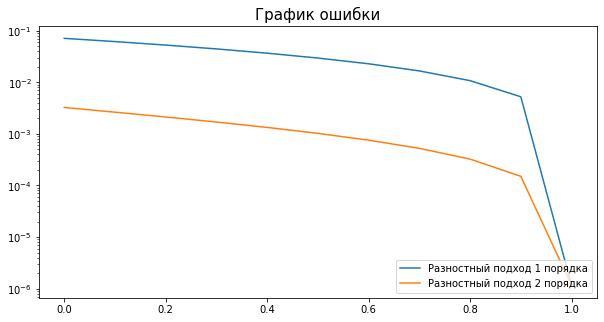

In [6]:
fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки", fontsize=15)
ax_real.plot(start_x, loss_progonka_1, label="Разностный подход 1 порядка")
ax_real.plot(start_x, loss_progonka_2, label="Разностный подход 2 порядка")
ax_real.legend(loc='lower right')
plt.yscale('log')

График зависимости мах ошибки от шага

In [7]:
def max_loss(predict, real):
  loss = 0
  for i in range(len(predict)):
    if loss < np.abs(real[i]-predict[i]):
      loss = np.abs(real[i]-predict[i])
  return loss

In [8]:
loss_1 = []
loss_2 = []
step=[]

hrange = np.arange(0.001,0.1,0.001)
for i in range(len(hrange)):
  h = hrange[i]
  n = int((FINISH - START)//h)
  start_xx = np.linspace(START, FINISH, n)
  h = start_xx[3]-start_xx[2]

  start_yy = solution( start_xx )

  step.append( h )
  loss_1.append( max_loss( Difference_approach_1(start_xx, P, Q, F, start_arr), start_yy ))
  loss_2.append( max_loss( Difference_approach_2(start_xx, P, Q, F, start_arr), start_yy ))

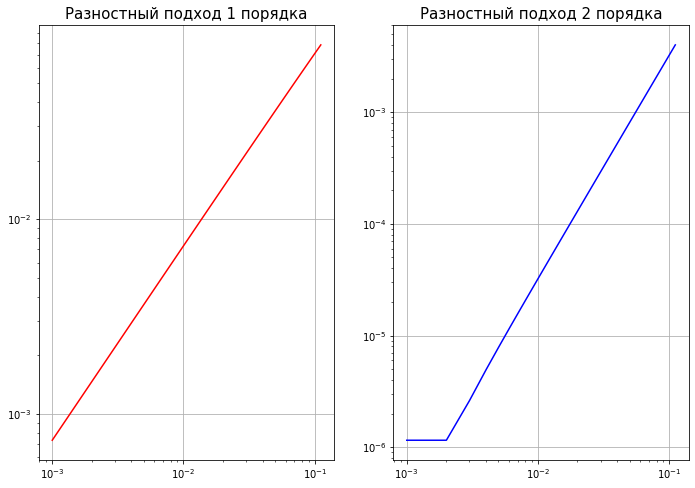

In [9]:
fig = plt.figure(figsize=(18,8))

ax_1 = fig.add_subplot(1,3,1)
ax_1.plot(step, loss_1, 'r')
ax_1.set_title("Разностный подход 1 порядка", fontsize=15)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')

ax_2 = fig.add_subplot(1,3,2)
ax_2.plot(step, loss_2, 'b')
ax_2.set_title("Разностный подход 2 порядка", fontsize=15)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')

## Поправка Рунге к разностному подходу 1 порядка

In [ ]:
# loss_3.append( max_loss( runge_1(start_xx, P, Q, F, start_arr), start_yy ))


# ax_1 = fig.add_subplot(1,3,3)
# ax_1.plot(step, loss_3, 'r')
# ax_1.set_title("Разностный подход 1 порядка с поправкой Рунге", fontsize=15)
# plt.grid(True)
# plt.yscale('log')
# plt.xscale('log')

In [10]:
def runge_1(start_x, P, Q, F, start_arr):
    p = 1
    h = start_x[3] - start_x[2] 
    axis_y = []

    N_2 = int((FINISH-START)//(h/2))+2
    start_x_2 = np.linspace(START, FINISH, N_2)

    y_DA_1 = Difference_approach_1(start_x, P, Q, F, start_arr)
    y_DA_2 = Difference_approach_1(start_x_2, P, Q, F, start_arr)[::2]

    for i in range(len(y_DA_1)):
        axis_y.append(  y_DA_2[i] + (y_DA_2[i] - y_DA_1[i]) / (2**p - 1)  )  
    return axis_y

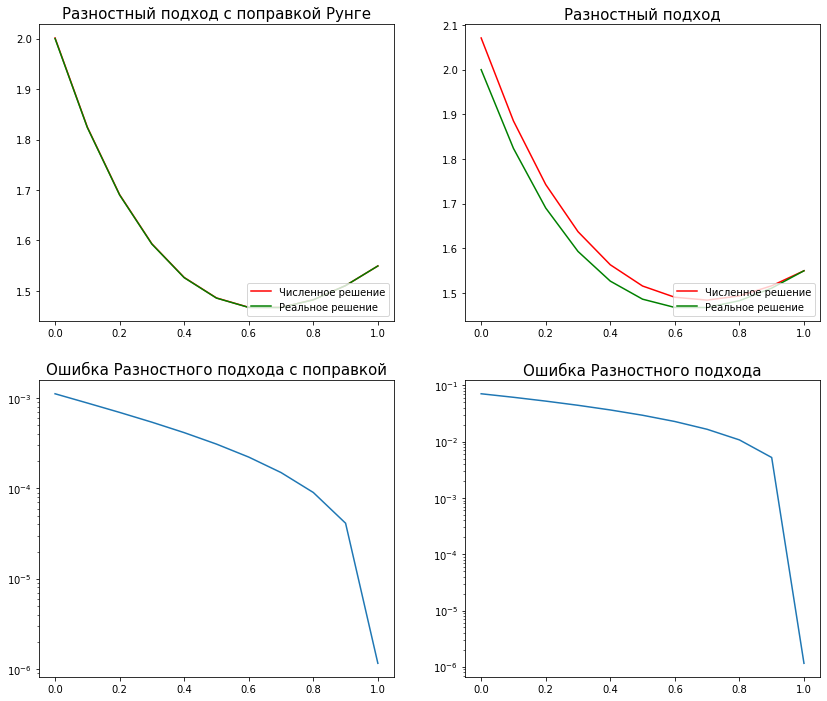

In [11]:
h_1 = 0.1
N_1 = int((FINISH-START)//h_1)+2
start_x_1 = np.linspace(START, FINISH, N_1)
start_y_1 = solution( start_x_1 )

y_DA_runge = runge_1(start_x_1, P, Q, F, start_arr)
y_DA = Difference_approach_1(start_x_1, P, Q, F, start_arr)

loss_DA_runge = []
for i in range(len(start_x_1)):
    loss_DA_runge.append(abs(start_y_1[i]-y_DA_runge[i]))
loss_DA = []
for i in range(len(start_x_1)):
    loss_DA.append(abs(start_y_1[i]-y_DA[i]))

#---------------------------------------------------------------------
fig = plt.figure(figsize=(14,12))

ax_1 = fig.add_subplot(2,2,1)
ax_1.set_title("Разностный подход с поправкой Рунге", fontsize=15)
ax_1.plot(start_x_1, y_DA_runge, c='red', label="Численное решение")
ax_1.plot(start_x_1, start_y_1, c='green', label="Реальное решение")
ax_1.legend(loc='lower right')
# plt.yscale('log')

ax_2 = fig.add_subplot(2,2,2)
ax_2.set_title("Разностный подход", fontsize=15)
ax_2.plot(start_x_1, y_DA, c='red', label="Численное решение")
ax_2.plot(start_x_1, start_y_1, c='green', label="Реальное решение")
ax_2.legend(loc='lower right')
# plt.yscale('log')

ax_4 = fig.add_subplot(2,2,4)
ax_4.set_title("Ошибка Разностного подхода", fontsize=15)
ax_4.plot(start_x_1, loss_DA)
plt.yscale('log')

ax_3 = fig.add_subplot(2,2,3)
ax_3.set_title("Ошибка Разностного подхода с поправкой", fontsize=15)
ax_3.plot(start_x_1, loss_DA_runge)
plt.yscale('log')

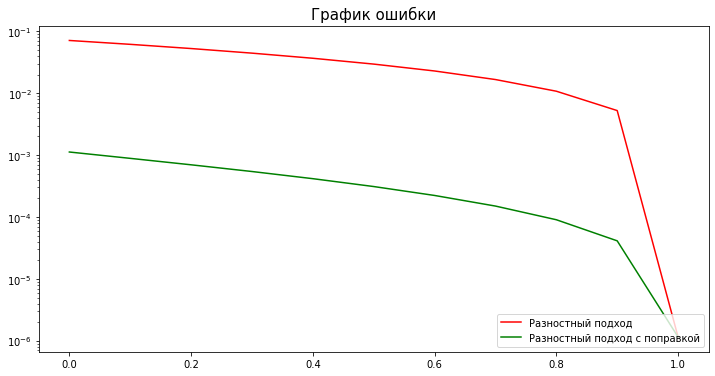

In [12]:
fig = plt.figure(figsize=(12,6))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки", fontsize=15)
ax_real.plot(start_x_1, loss_DA, c='red', label="Разностный подход")
ax_real.plot(start_x_1, loss_DA_runge, c='green', label="Разностный подход с поправкой")
ax_real.legend(loc='lower right')
plt.yscale('log')